In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'val'
test_path = 'test'

In [4]:
# useful for getting number of output classes
folders = glob('train/*')

In [5]:
folders

['train\\Healthyplants',
 'train\\LowFertileAndLight',
 'train\\WeedType1',
 'train\\WeedType2',
 'train\\WeedType3',
 'train\\WeedType4']

In [6]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [7]:
from tensorflow.keras.regularizers import l2

In [8]:
# Part 2 - Building the CNN
# Initialising the CNN
model = tf.keras.models.Sequential()

# Step 1 - Convolution
model.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[224, 224, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
model.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a third convolutional layer
model.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
model.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

#Step 5 - Output Layer
model.add(Dense(6, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [10]:
# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   brightness_range= [0.7, 1.3],
                                   horizontal_flip = True,
                                   ) 
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
train_generator = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 ) 

Found 2445 images belonging to 6 classes.


In [13]:
valid_generator = train_datagen.flow_from_directory('val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            ) 

Found 813 images belonging to 6 classes.


In [14]:
test_generator = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical',
                                            ) 

Found 819 images belonging to 6 classes.


In [16]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [19]:
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=10,
  steps_per_epoch=len(train_generator),
  validation_steps=len(valid_generator)
)

Epoch 1/10
77/77 [==============================] - 54s 697ms/step - loss: 1.0139 - accuracy: 0.7427 - val_loss: 1.0192 - val_accuracy: 0.7319
Epoch 2/10
77/77 [==============================] - 53s 688ms/step - loss: 1.0293 - accuracy: 0.7190 - val_loss: 1.0253 - val_accuracy: 0.7196
Epoch 3/10
77/77 [==============================] - 53s 688ms/step - loss: 1.0092 - accuracy: 0.7476 - val_loss: 0.9991 - val_accuracy: 0.7651
Epoch 4/10
77/77 [==============================] - 53s 694ms/step - loss: 0.9957 - accuracy: 0.7689 - val_loss: 0.9973 - val_accuracy: 0.7577
Epoch 5/10
77/77 [==============================] - 53s 692ms/step - loss: 0.9927 - accuracy: 0.7706 - val_loss: 1.0076 - val_accuracy: 0.7417
Epoch 6/10
77/77 [==============================] - 53s 688ms/step - loss: 0.9829 - accuracy: 0.7787 - val_loss: 0.9532 - val_accuracy: 0.8303
Epoch 7/10
77/77 [==============================] - 53s 689ms/step - loss: 0.9581 - accuracy: 0.8237 - val_loss: 0.9685 - val_accuracy: 0.8081

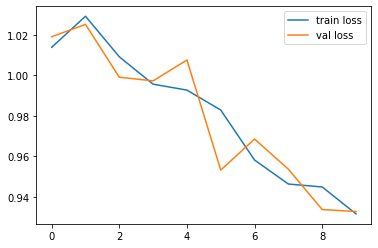

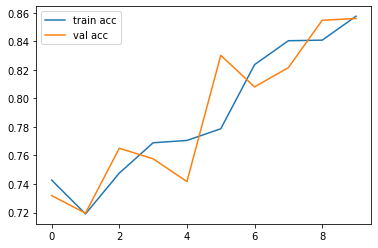

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('logs/model_picdeepSVM.h5')

In [22]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

819/819 - 11s - loss: 0.9534 - accuracy: 0.8230

Test accuracy: 0.8229548335075378

Test loss: 0.9534081220626831


test accuracy : 40.537240537240535


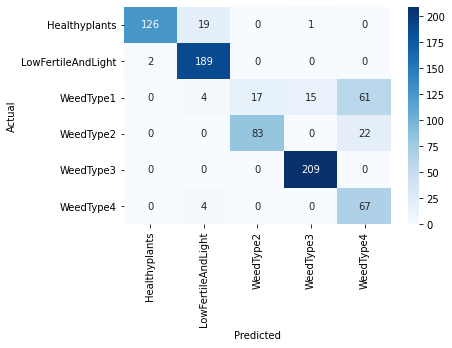

In [26]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

model = tf.keras.models.load_model('logs/model_picdeepSVM.h5')
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
   X_test,Y_test = test_generator.next()
   y_prob.append(model.predict(X_test))
   y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues', annot=True,fmt='d')
plt.show
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))